## ANALISIS EXPLORATORIO (EDA)

In [1]:
import kaggle
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# !mkdir ./peliculas
# kaggle.api.dataset_download_files('alanvourch/tmdb-movies-daily-updates', path='peliculas', unzip=True)

In [3]:
# Cargar el dataset
df = pd.read_csv('peliculas/TMDB_all_movies.csv',parse_dates=['release_date'])

# Mostrar información básica del dataset
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras filas:")
print(df.head())
print("\nTipos de datos:")
print(df.dtypes)
print("\nValores faltantes:")

Dimensiones del dataset: (1159077, 28)

Primeras filas:
   id                             title  vote_average  vote_count    status  \
0   2                             Ariel           7.1       367.0  Released   
1   3               Shadows in Paradise           7.3       430.0  Released   
2   5                        Four Rooms           5.9      2780.0  Released   
3   6                    Judgment Night           6.5       360.0  Released   
4   8  Life in Loops (A Megacities RMX)           7.2        30.0  Released   

  release_date     revenue  runtime      budget    imdb_id  ...  \
0   1988-10-21         0.0     73.0         0.0  tt0094675  ...   
1   1986-10-17         0.0     74.0         0.0  tt0092149  ...   
2   1995-12-09   4257354.0     98.0   4000000.0  tt0113101  ...   
3   1993-10-15  12136938.0    109.0  21000000.0  tt0107286  ...   
4   2006-01-01         0.0     80.0     42000.0  tt0825671  ...   

                         spoken_languages  \
0                    

In [4]:
# chequeo de llave unica 
print(df.id.is_unique)

True


In [5]:
# primeras peliculas
df.title.head(5)

0                               Ariel
1                 Shadows in Paradise
2                          Four Rooms
3                      Judgment Night
4    Life in Loops (A Megacities RMX)
Name: title, dtype: object

In [6]:
# numero de peliculas sin titulos
print(df.title.isnull().sum())

14


In [7]:
# estadisticas descriptivas de la votación promedio de las peliculas 
df['vote_average'].describe()

count    1.159077e+06
mean     2.008589e+00
std      3.057276e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.000000e+00
max      1.000000e+01
Name: vote_average, dtype: float64

In [8]:

num_movies_zero_note = (df['vote_average'] == 0.0).sum()
print(f"Número de películas con vote_average=0.0: {num_movies_zero_note}")

# Vemos que la variable 'vote_average' tiene mas del 50% de valores iguales a cero. Lo que parece indicar que este valor se le puso a las películas sin nota.

Número de películas con vote_average=0.0: 770428


In [9]:
num_movies_zero_count = (df['vote_count'] == 0.0).sum()
print(f"Número de películas con vote_count=0.0: {num_movies_zero_count}")
# Parece ser que la columna 'vote_count' también tiene muchos valores en cero, lo que refuerza la idea de que muchas películas no han sido votadas.

Número de películas con vote_count=0.0: 769940


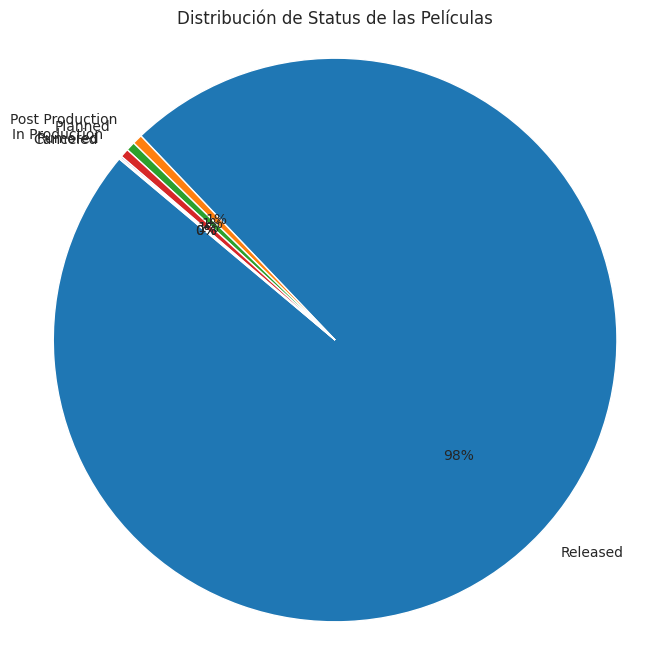

In [10]:
# Gráfico de torta para la variable 'status'
status_counts = df['status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.0f%%', startangle=140)
plt.title('Distribución de Status de las Películas')
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()

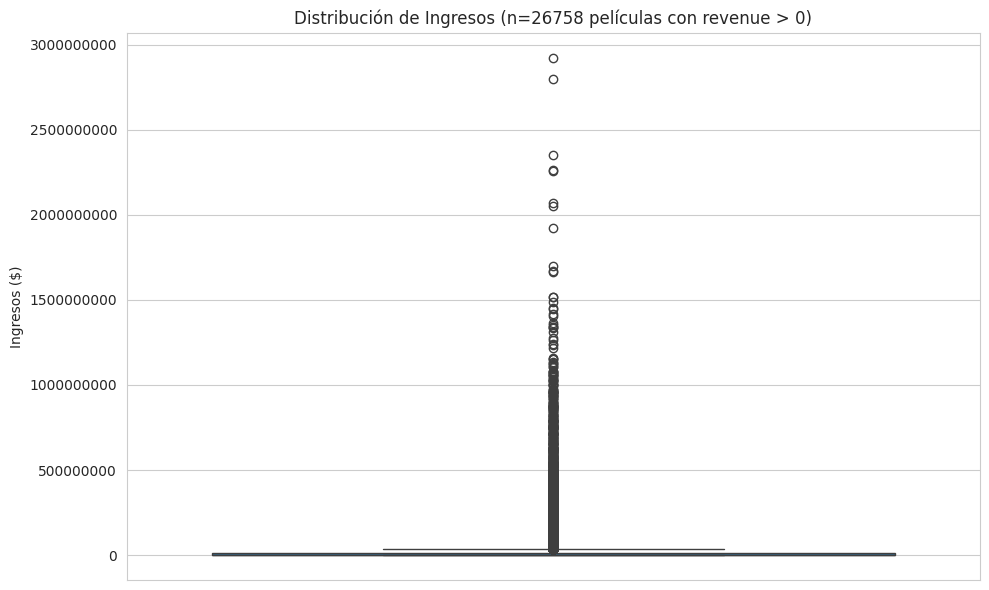

Películas con revenue > 0: 26758
Películas con revenue = 0: 1132318


In [11]:
# Filtrar películas con revenue > 0
df_revenue = df[df['revenue'] > 0]

plt.figure(figsize=(10, 6))
sns.boxplot(y=df_revenue['revenue'])
plt.title(f'Distribución de Ingresos (n={len(df_revenue)} películas con revenue > 0)')
plt.ylabel('Ingresos ($)')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

print(f"Películas con revenue > 0: {len(df_revenue)}")
print(f"Películas con revenue = 0: {(df['revenue'] == 0).sum()}")

In [12]:
# Obtener el top 10 de películas con mayores ingresos
top_10_revenue = df_revenue.sort_values(by='revenue', ascending=False).head(10)
print(top_10_revenue[['title', 'revenue']])

                               title       revenue
12037                         Avatar  2.923706e+09
182732             Avengers: Endgame  2.799439e+09
53745       Avatar: The Way of Water  2.353096e+09
471                          Titanic  2.264162e+09
690529                      Ne Zha 2  2.259822e+09
88713   Star Wars: The Force Awakens  2.068224e+09
182734        Avengers: Infinity War  2.052415e+09
444966       Spider-Man: No Way Home  1.921847e+09
718831                  Inside Out 2  1.698864e+09
86230                 Jurassic World  1.671537e+09


In [13]:
# Estadisticos de resumen para la duracion de las películas

mask = df['runtime'] > 0
df.loc[mask, 'runtime'].describe()

count    892577.000000
mean         57.440448
std          56.358720
min           1.000000
25%          13.000000
50%          57.000000
75%          90.000000
max       14400.000000
Name: runtime, dtype: float64

In [14]:
# la mitad de las peliculas no alcanza la hora de duración.
# Se observa que la base de datos contiene un % significativo de películas que se podrian considerar como un cortometraje 

In [15]:
df['budget'].describe()
# ¿ Serán las películas con presupuesto cero grabadas con un celular o cámara casera ?

count    1.159077e+06
mean     2.796838e+05
std      4.639131e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.899000e+08
Name: budget, dtype: float64

In [16]:
 # Número de películas con un ID de IMDb válido
print(df['imdb_id'].notna().sum())
# podriamos considerar que las peliculas sin imdb_id son de baja calidad o producciones caseras, a la hora de querer definir un filtro para un modelo de recomendación este seria un buen criterio

652446


<Axes: xlabel='original_language'>

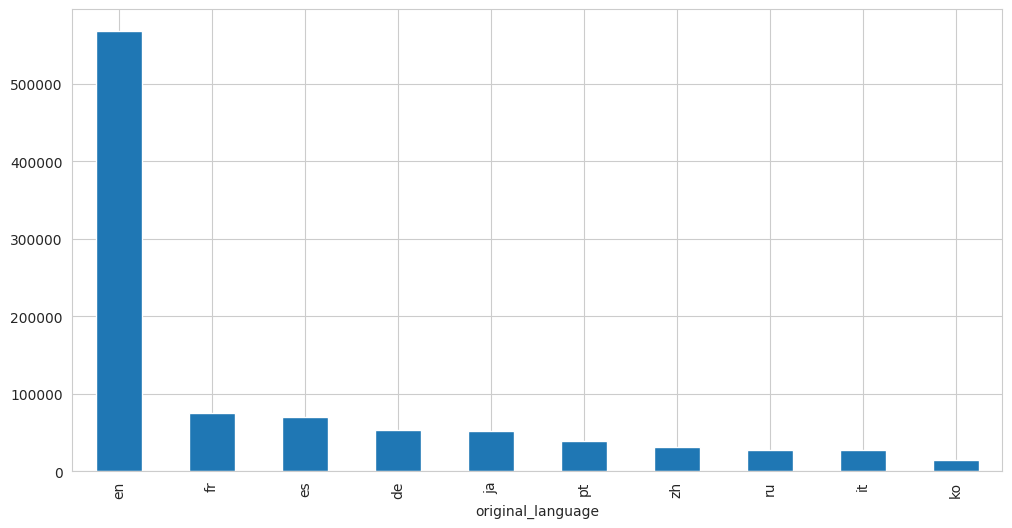

In [17]:
# Distribución del lenguaje original de las películas
df['original_language'].value_counts().head(10).plot(kind='bar')


In [18]:
# metrica de popularidad de TMDB
df['popularity'].describe() 

count    1.159077e+06
mean     8.529957e-01
std      1.858241e+00
min      0.000000e+00
25%      1.227000e-01
50%      6.000000e-01
75%      9.640000e-01
max      5.156229e+02
Name: popularity, dtype: float64

In [19]:
# Las peliculas pueden pertenecer a varios géneros  
df['genres'].head(10)  

0         Comedy, Drama, Romance, Crime
1                Comedy, Drama, Romance
2                                Comedy
3               Action, Crime, Thriller
4                           Documentary
5                                 Drama
6    Adventure, Action, Science Fiction
7                     Animation, Family
8                Comedy, Drama, Romance
9                                 Drama
Name: genres, dtype: object

In [20]:
# Numero de peliculas producidas por país
df['production_countries'].value_counts()

production_countries
United States of America                                                               166440
Japan                                                                                   43799
United Kingdom                                                                          42335
France                                                                                  40051
Germany                                                                                 35886
                                                                                        ...  
Belgium, Denmark, Germany, Luxembourg                                                       1
Brazil, Iceland, Portugal, Spain                                                            1
Poland, Germany, Czech Republic, Sweden                                                     1
Qatar, United Kingdom, United States of America                                             1
United Kingdom, United States of Americ

In [21]:
df['spoken_languages'].value_counts()

spoken_languages
English                                                             234184
Español                                                              48114
日本語                                                                  44499
No Language                                                          43517
Français                                                             43290
                                                                     ...  
Deutsch, العربية, English, עִבְרִית                                      1
普通话, Deutsch, English, Français, हिन्दी, Norsk                           1
English, svenska, Wolof                                                  1
Gaeilge, Español                                                         1
беларуская мова, Deutsch, Lietuvių, Română, Pусский, Український         1
Name: count, Length: 7607, dtype: int64

In [22]:
df['director'].value_counts()

director
Dave Fleischer                        623
Gérard Courant                        449
D.W. Griffith                         448
Kevin Dunn                            440
Gilbert M. Anderson                   372
                                     ... 
Caio Kulkamp                            1
Monique                                 1
Barend Van Der Watt, Henk Ekermans      1
Luke Petenbrink                         1
Maddie Bear, Claire Musser              1
Name: count, Length: 401880, dtype: int64

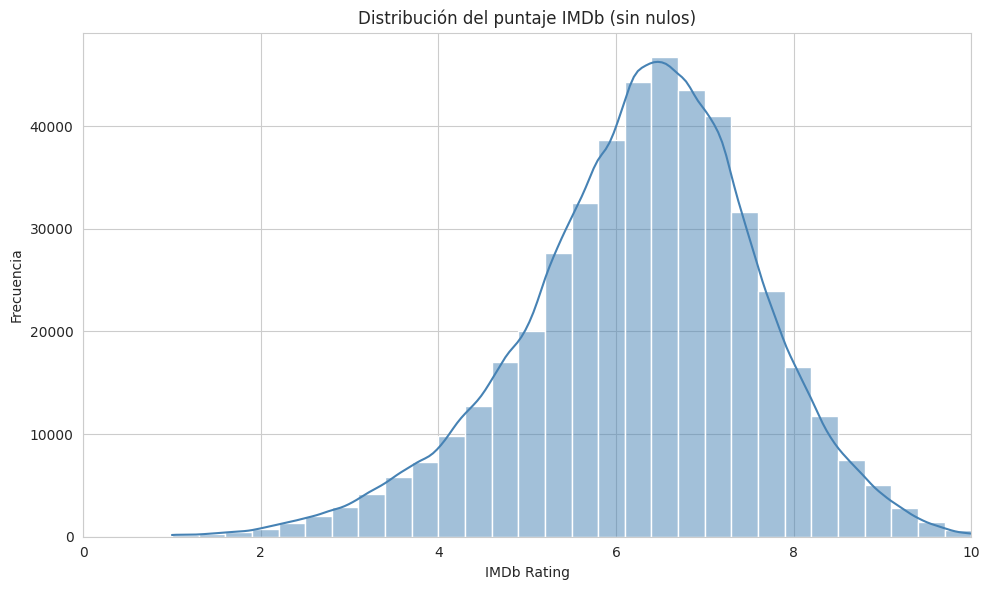

In [23]:
# Gráfico de la distribución del puntaje IMDb filtrando valores nulos
imdb_scores = df['imdb_rating'].dropna()

plt.figure(figsize=(10,6))
sns.histplot(imdb_scores, bins=30, kde=True, color='steelblue')
plt.title('Distribución del puntaje IMDb (sin nulos)')
plt.xlabel('IMDb Rating')
plt.ylabel('Frecuencia')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()
# una variable bastante util para utilizar en un modelo de recomendación

In [24]:
df_filtered = df[df['overview'].notna() & (df['overview'] != '')]
print(f"Número de películas con resumen de trama: {len(df_filtered)}")   

Número de películas con resumen de trama: 982448


In [25]:
# Limpiar caracteres problemáticos en el campo overview de df_filtered
df_filtered['overview'] = df_filtered['overview'].str.replace('/', '', regex=False)
df_filtered['overview'] = df_filtered['overview'].str.replace('\\', '', regex=False)
df_filtered['overview'] = df_filtered['overview'].str.replace('"', '', regex=False)
df_filtered['overview'] = df_filtered['overview'].str.replace('"', '', regex=False)
df_filtered['overview'] = df_filtered['overview'].str.replace('|','' ,regex=False)
df_filtered['overview'] = df_filtered['overview'].str.replace('||','', regex=False)
df_filtered['overview'] = df_filtered['overview'].str.replace('{','', regex=False)
df_filtered['overview'] = df_filtered['overview'].str.replace('}','', regex=False)


/tmp/ipykernel_84902/1402205905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['overview'] = df_filtered['overview'].str.replace('/', '', regex=False)
/tmp/ipykernel_84902/1402205905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['overview'] = df_filtered['overview'].str.replace('\\', '', regex=False)
/tmp/ipykernel_84902/1402205905.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [26]:
# analisis bivariado
# Top 5 películas más populares por año (popularity)
df_filtered['year'] = df_filtered['release_date'].dt.year
top_5_by_year = df_filtered[df_filtered['release_date'].dt.year < 2026].dropna(subset=['popularity', 'year']).groupby('year').apply(
    lambda x: x.nlargest(5, 'popularity')[['title','popularity']]).reset_index(level=0)
top_5_by_year = top_5_by_year.sort_values(by=['year', 'popularity'], ascending=[True, False])
print(top_5_by_year)

/tmp/ipykernel_84902/1915150710.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year'] = df_filtered['release_date'].dt.year


           year                                 title  popularity
196914   1874.0                      Passage of Venus      2.7899
1156930  1878.0                             L'Amazone      0.2489
1152654  1878.0                           La Glissade      0.1771
1140250  1878.0                    Les Chiens Savants      0.1342
1141612  1878.0                     Le singe musicien      0.0554
...         ...                                   ...         ...
961857   2025.0                         The Housemaid    434.5679
760005   2025.0                            Zootopia 2    286.9982
996170   2025.0  WWE Raw on Netflix Premier Post-Show    272.5999
1000352  2025.0                     The Shadow's Edge    266.2997
928104   2025.0                 Murder at the Embassy    208.9002

[692 rows x 3 columns]


/tmp/ipykernel_84902/1915150710.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_by_year = df_filtered[df_filtered['release_date'].dt.year < 2026].dropna(subset=['popularity', 'year']).groupby('year').apply(


              budget  popularity   revenue
budget      1.000000    0.198861  0.731244
popularity  0.198861    1.000000  0.187906
revenue     0.731244    0.187906  1.000000


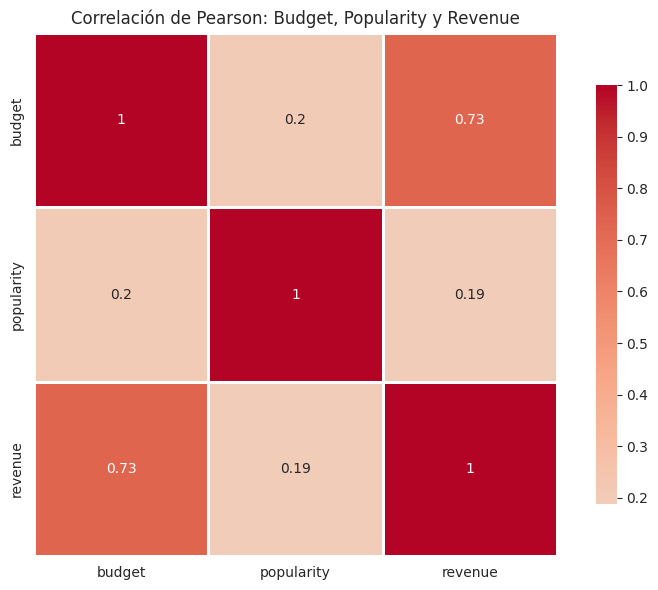

In [27]:
# Calcular la correlación de Pearson entre budget, popularity y revenue
correlation_matrix = df_filtered[['budget', 'popularity', 'revenue']].corr()
print(correlation_matrix)

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlación de Pearson: Budget, Popularity y Revenue')
plt.tight_layout()
plt.show()

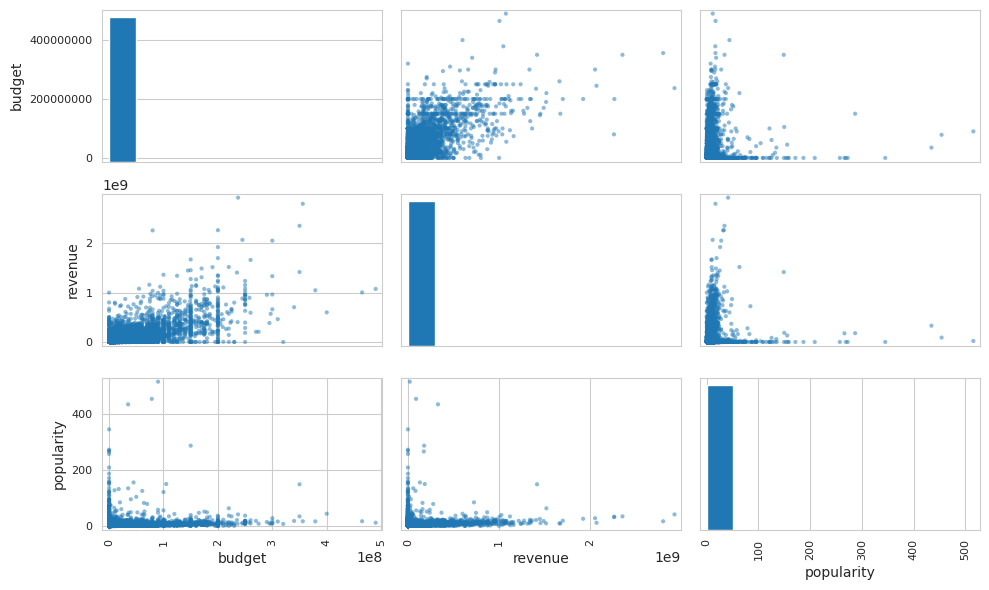

In [28]:
# gráfico de matriz de dispersión (scatter matrix) entre budget, revenue y popularity
from pandas.plotting import scatter_matrix

scatter_matrix(df_filtered[['budget', 'revenue', 'popularity']], 
               alpha=0.5, figsize=(10, 6), diagonal='hist')
plt.tight_layout()
plt.show()

In [29]:
# Vemos que peliculas con mayor presupuesto tienden a generar mayores ingresos, pero la popularidad no tiene una relación clara con los otros 2 factores.
# lo que puede deberse a que la popularidad puede estar influenciada por muchos otros factores, el marketing, las tendencias del mercado, etc.

In [31]:
df_filtered.to_csv('docker/import/movies_with_overview.csv',quoting=1, escapechar="\\", index=False)